In [3]:
# Exploring Marathon Finishing Times 

# url = ('https://raw.githubusercontent.com/jakevdp/'
#'marathon-data/master/marathon-data.csv')
# !cd data && curl -O {url}
%matplotlib inline 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np 
import pandas as pd 

path = "/__PROJECTS/aa_CommonData/ml/"
data = pd.read_csv(path+"marathon-data.csv")
data.head()

,age,gender,split,final
0,33,M,01:05:38,02:08:51
1,32,M,01:06:26,02:09:28
2,31,M,01:06:49,02:10:42
3,38,M,01:06:16,02:13:45
4,31,M,01:06:32,02:13:59


In [4]:
data.dtypes

age        int64
gender    object
split     object
final     object
dtype: object

In [5]:
import datetime 

def convert_time(s):
    h,m,s = map(int, s.split(":"))
    return datetime.timedelta(hours=h, minutes=m, seconds=s)

data = pd.read_csv(path+"marathon-data.csv", 
                   converters={"split":convert_time, "final":convert_time})
data.head()

,age,gender,split,final
0,33,M,0 days 01:05:38,0 days 02:08:51
1,32,M,0 days 01:06:26,0 days 02:09:28
2,31,M,0 days 01:06:49,0 days 02:10:42
3,38,M,0 days 01:06:16,0 days 02:13:45
4,31,M,0 days 01:06:32,0 days 02:13:59


In [6]:
data.dtypes

age                 int64
gender             object
split     timedelta64[ns]
final     timedelta64[ns]
dtype: object

In [7]:
data["split_sec"] = data["split"].view(int) / 1E9 
data["final_sec"] = data["final"].view(int) / 1E9
data.head()

,age,gender,split,final,split_sec,final_sec
0,33,M,0 days 01:05:38,0 days 02:08:51,3938.0,7731.0
1,32,M,0 days 01:06:26,0 days 02:09:28,3986.0,7768.0
2,31,M,0 days 01:06:49,0 days 02:10:42,4009.0,7842.0
3,38,M,0 days 01:06:16,0 days 02:13:45,3976.0,8025.0
4,31,M,0 days 01:06:32,0 days 02:13:59,3992.0,8039.0


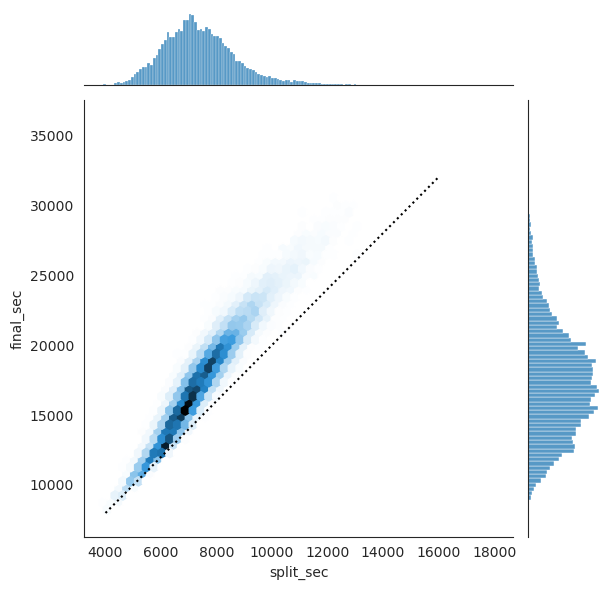

In [8]:
with sns.axes_style("white"):
    g = sns.jointplot(x="split_sec", y="final_sec", data=data, kind="hex")
    g.ax_joint.plot(np.linspace(4_000, 16_000), np.linspace(8_000,32_000), ":k")

# relationship between the split for the first half-marathon
# and the finishing time for the full marathon

In [9]:
data["split_frac"] = 1 - 2 * data["split_sec"] / data["final_sec"]
data.head()

,age,gender,split,final,split_sec,final_sec,split_frac
0,33,M,0 days 01:05:38,0 days 02:08:51,3938.0,7731.0,-0.018756
1,32,M,0 days 01:06:26,0 days 02:09:28,3986.0,7768.0,-0.026262
2,31,M,0 days 01:06:49,0 days 02:10:42,4009.0,7842.0,-0.022443
3,38,M,0 days 01:06:16,0 days 02:13:45,3976.0,8025.0,0.009097
4,31,M,0 days 01:06:32,0 days 02:13:59,3992.0,8039.0,0.006842


/home/x057/anaconda31/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


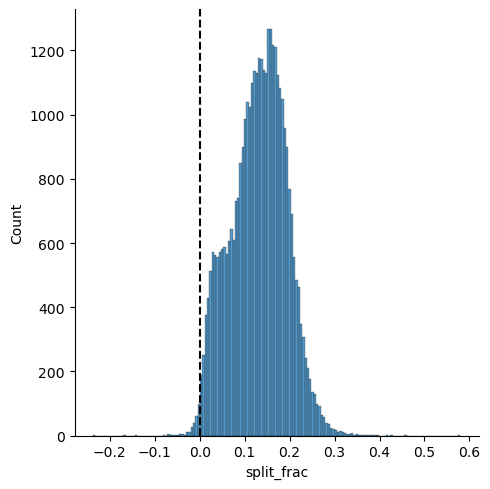

In [10]:
sns.displot(data["split_frac"], kde=False)
plt.axvline(0, color="k", linestyle="--")

# | show who completed race equaly for the first and second part of it 

In [11]:
sum(data.split_frac < 0)

251

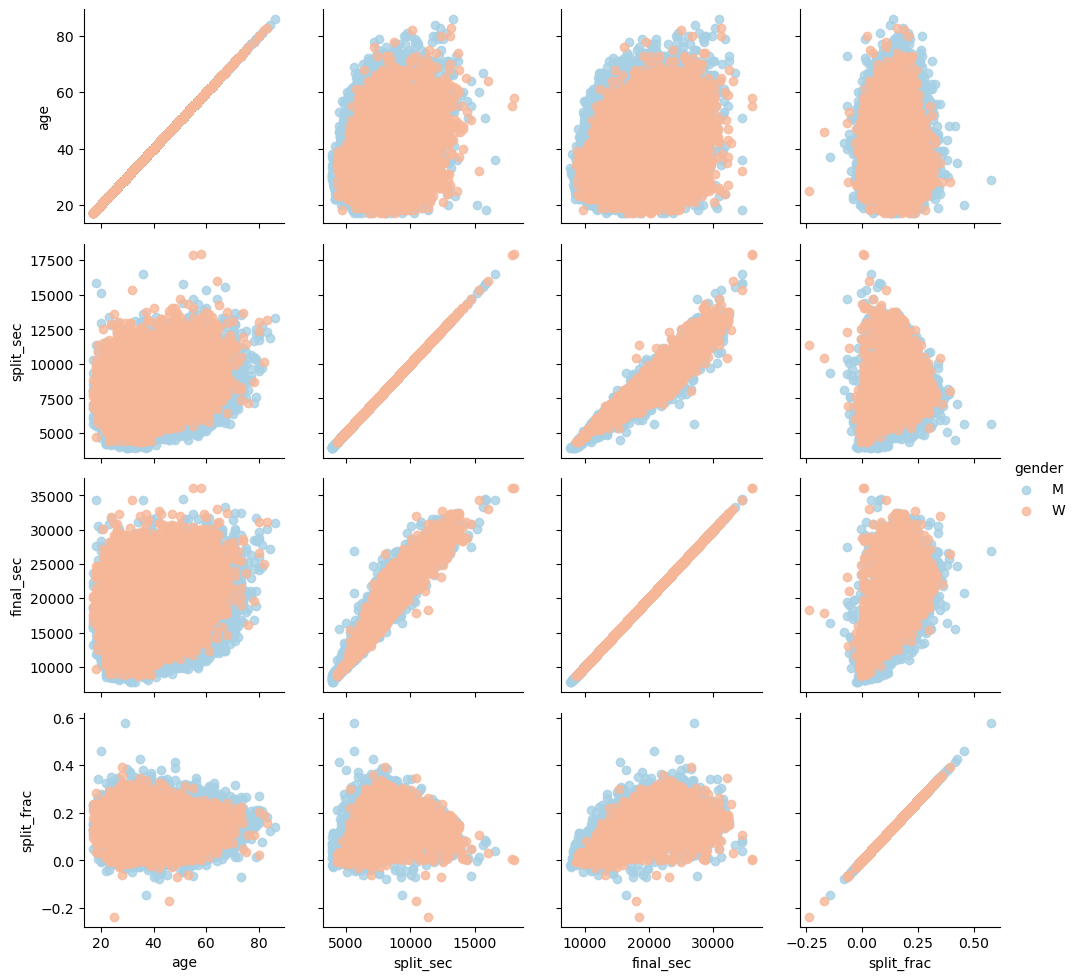

In [13]:
# парная сетка как помним один из способов посмотреть 
# сразу же все зависимости внутри данных в виде перекрещиваний
g = sns.PairGrid(
    data, vars=["age","split_sec", "final_sec", "split_frac"],
    hue="gender", palette="RdBu_r"
)
g.map(plt.scatter, alpha=0.8)
g.add_legend();

/tmp/ipykernel_484698/1162326759.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data.split_frac[data.gender=="M"], label="men", shade=True)
/tmp/ipykernel_484698/1162326759.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data.split_frac[data.gender=="W"], label="women", shade=True)


Text(0.5, 0, 'split_frac')

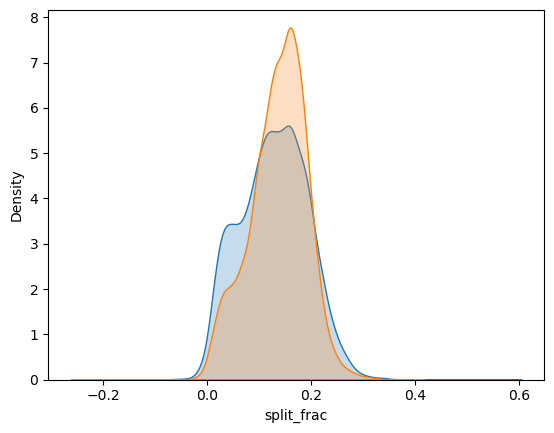

In [14]:
sns.kdeplot(data.split_frac[data.gender=="M"], label="men", shade=True)
sns.kdeplot(data.split_frac[data.gender=="W"], label="women", shade=True)
plt.xlabel("split_frac")

<Axes: xlabel='gender', ylabel='split_frac'>

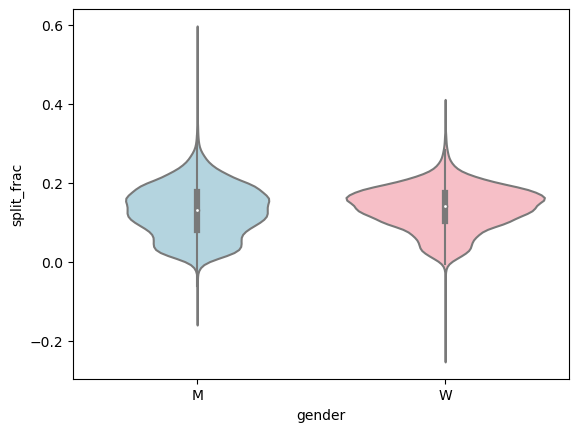

In [15]:
sns.violinplot(x="gender", y="split_frac", data=data, 
               palette=["lightblue","lightpink"])

In [16]:
data["age_dec"] = data.age.map(lambda age: 10 * (age // 10))
data.head()

,age,gender,split,final,split_sec,final_sec,split_frac,age_dec
0,33,M,0 days 01:05:38,0 days 02:08:51,3938.0,7731.0,-0.018756,30
1,32,M,0 days 01:06:26,0 days 02:09:28,3986.0,7768.0,-0.026262,30
2,31,M,0 days 01:06:49,0 days 02:10:42,4009.0,7842.0,-0.022443,30
3,38,M,0 days 01:06:16,0 days 02:13:45,3976.0,8025.0,0.009097,30
4,31,M,0 days 01:06:32,0 days 02:13:59,3992.0,8039.0,0.006842,30


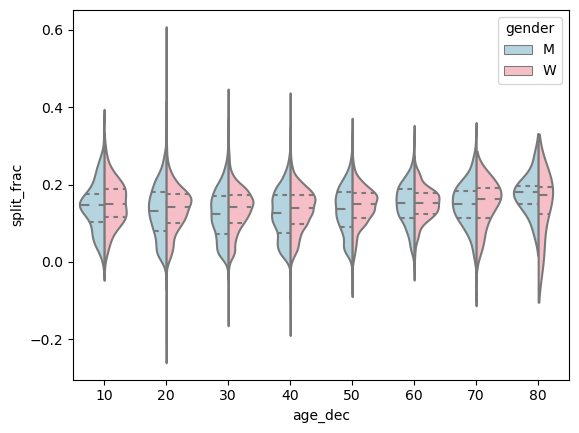

In [17]:
men = (data.gender == "M")
women = (data.gender == "W")

with sns.axes_style(style=None):
    sns.violinplot(
        x="age_dec",
        y="split_frac",
        hue="gender",
        data=data,
        split=True, inner="quartile",
        palette=["lightblue","lightpink"]
    );

In [18]:
(data.age > 80).sum()


7

/home/x057/anaconda31/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/x057/anaconda31/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


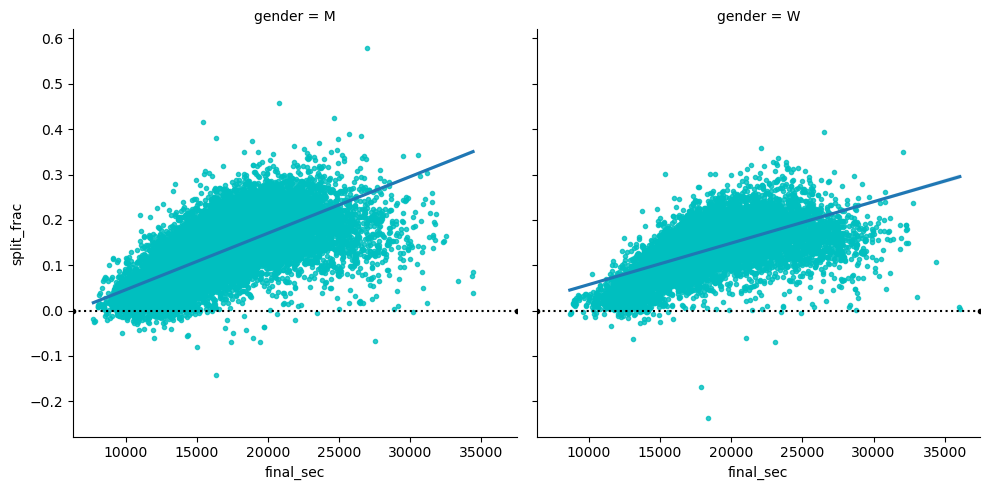

In [19]:
g = sns.lmplot(
    x = "final_sec",
    y = "split_frac",
    col="gender",
    data=data, 
    markers=".",
    scatter_kws=dict(color="c")
)
g.map(plt.axhline, y=0.0, color="k", ls=":")